# Додаткові завдання №4

## Задача 1.2.15
Нехай $\Omega = {1, 2, \ldots, 2n}$.
Всiм числам приписанi ймовiрностi, пропорцiйнi логарифмам цих чисел.
Знайти цi ймовiрностi.
Знайти ймовiрнiсть того, що в результатi експерименту з’явиться:
1. парне число;
2. непарне число.

### Завдання 1
Реалізуйте випадкову величину, описану в умові задачі, за допомогою класу [scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) в залежності від параметра $n$.

Створіть дві випадкові величини для:
- $n = 10$;
- $n = 25$.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_discrete

In [10]:
def get_rv(n):
    xk = np.arange(1, 2*n+1)
    pk = np.log(xk)/sum(np.log(xk))
#     print(xk, pk, sum(pk))
    return rv_discrete(name='rv{}'.format(n), values=(xk, pk))
rv10 = get_rv(10)
rv25 = get_rv(25)

### Завдання 2
Зобразіть графічно функцію щільності, функцію розподілу та гістограму $10000$ значень отриманої випадкової величини в залежності від параметра $n$:
- $n = 10$;
- $n = 25$.

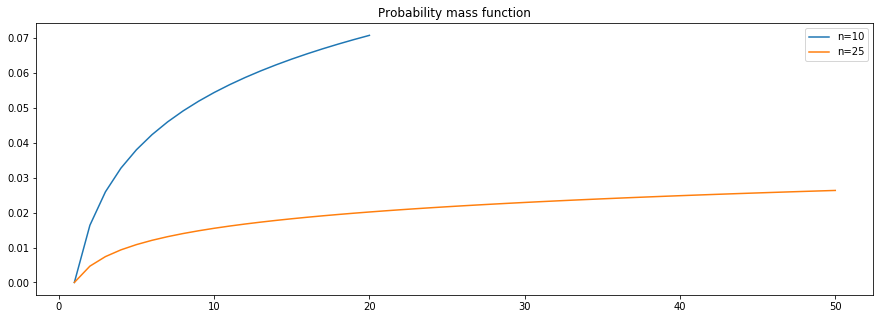

In [21]:
x10 = np.arange(1, 21)
x25 = np.arange(1, 51)
plt.figure(figsize=(15, 5))
plt.plot(x10, rv10.pmf(x10), label='n=10')
plt.plot(x25, rv25.pmf(x25), label='n=25')
plt.legend(loc='best')
plt.title('Probability mass function')
plt.show()

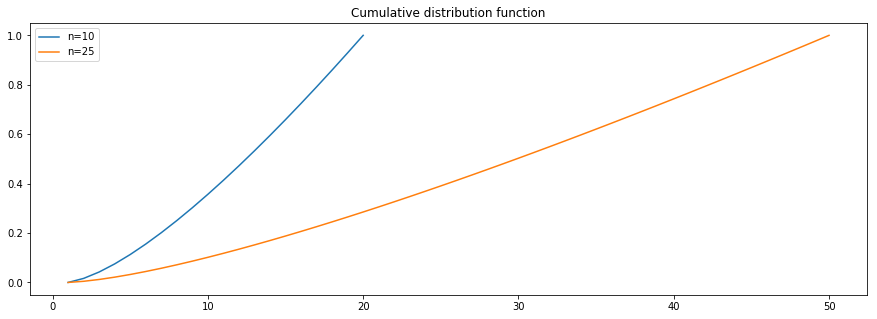

In [22]:
x10 = np.arange(1, 21)
x25 = np.arange(1, 51)
plt.figure(figsize=(15, 5))
plt.plot(x10, rv10.cdf(x10), label='n=10')
plt.plot(x25, rv25.cdf(x25), label='n=25')
plt.legend(loc='best')
plt.title('Cumulative distribution function')
plt.show()

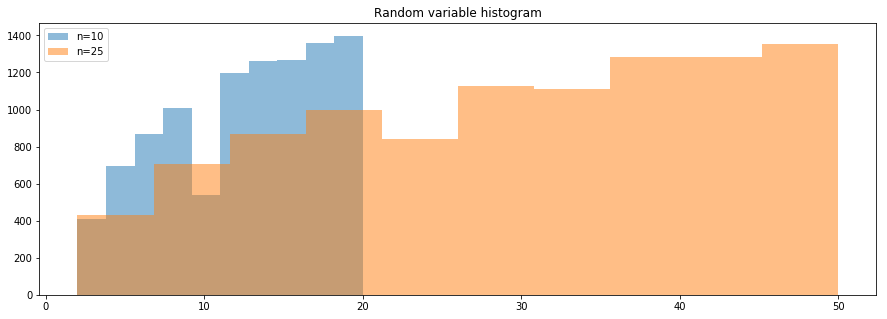

In [28]:
x10 = np.arange(1, 21)
x25 = np.arange(1, 51)
plt.figure(figsize=(15, 5))
plt.hist(rv10.rvs(size=10000), label='n=10', alpha=0.5)
plt.hist(rv25.rvs(size=10000), label='n=25', alpha=0.5)
plt.legend(loc='best')
plt.title('Random variable histogram')
plt.show()

### Завдання 3
Напишіть функцію для обрахунку теоретичної (через щільність отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [30]:
def get_proba(n):
    rv = get_rv(n)
    x_odd = np.arange(1, 2*n+1, 2)
    x_even = np.arange(2, 2*n+1, 2)
    p_odd = rv.pmf(x_odd)
    p_even = rv.pmf(x_even)
    return(sum(p_odd), sum(p_even))

for n in [10, 25]:
    print('For n =', n)
    print('Probability for:\n\todd = {}\n\teven = {}'.format(*get_proba(n)))

For n = 10
Proba for:
	odd = 0.47949537007207726
	even = 0.5205046299279228
For n = 25
Proba for:
	odd = 0.4926359260141096
	even = 0.5073640739858903


### Завдання 4
Напишіть функцію для обрахунку еміричної (симулюванням $1000000$ значень отриманої випадкової величини) імовірності в залежності від параметра $n$.

Виведіть результат для:
- $n = 10$;
- $n = 25$.

In [36]:
def get_proba_empiric(n):
    rv = get_rv(n)
    size = 1000000
    sample = list(rv.rvs(size=size) % 2)
    odd = sample.count(1)
    even = sample.count(0)
    print(odd, even)
    
for n in [10, 25]:
    print('For n =', n)
    print('Empirical probability for:\n\todd = {}\n\teven = {}'.format(*get_proba(n)))

For n = 10
Empirical probability for:
	odd = 0.47949537007207726
	even = 0.5205046299279228
For n = 25
Empirical probability for:
	odd = 0.4926359260141096
	even = 0.5073640739858903
